In [1]:
%matplotlib inline

import sys
sys.path.append("..")

import matplotlib
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
from uqgrid.uqgrid import integrate_system
from uqgrid.parse import load_psse, add_dyr
from uqgrid.pflow import runpf

In this case, instead of an infinite bus we have a passive ZIP load. A parameter $\alpha$ determines the composition (mixture of pure PQ and impedance load). We perturb the system and see how it behaves. Let's calculate sensitivities numerically and analitically.

In [3]:
h = 1.0/120.0 # integration step in seconds
nsteps = 1000
eps = 1e-5

# create system
psys = load_psse(raw_filename="../data/ieee9_v33.raw")
psys.add_busfault(1, 1.0, 0.1)
psys.createYbusComplex()
add_dyr(psys, "../data/ieee9bus.dyr")

alpha = 0.5
alpha2 = 0.5 + eps
alpha3 = 0.5 - eps

# integrate nominal trajectory
psys.loads[0].set_alpha(alpha)
psys.loads[1].set_alpha(alpha)
psys.loads[2].set_alpha(alpha)
tvec, history, history_u, history_v, history_m = integrate_system(psys, verbose=False, 
                                                        comp_sens=True, tend=10.0, dt=h)

Now we can integrate the OMIB

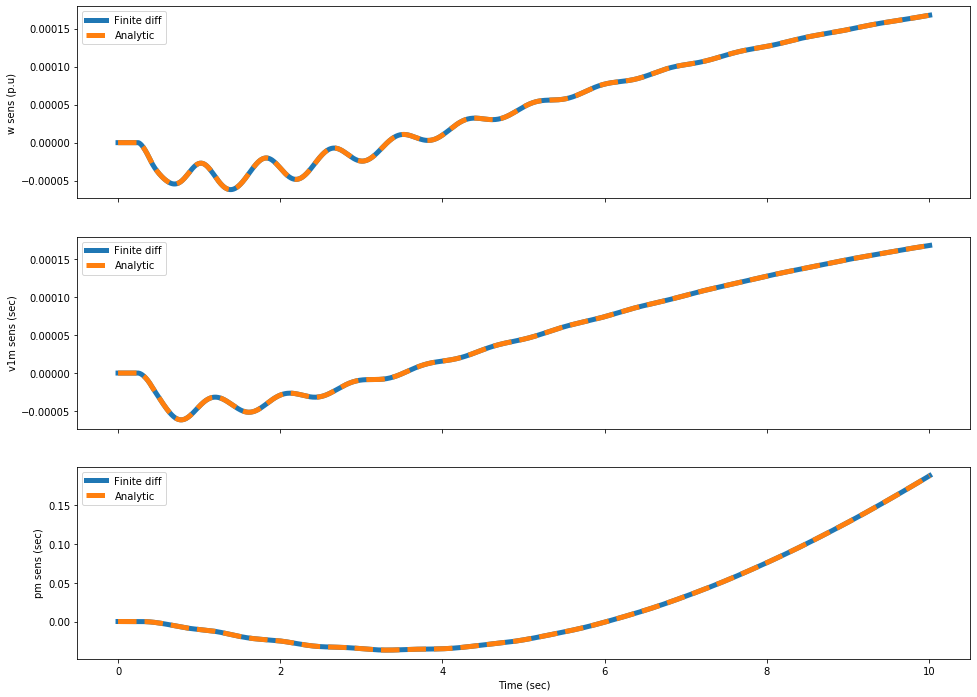

In [6]:
plt.figure(figsize = (16, 12))

load_idx = 0


# Integrate perturbed trajectories
psys.loads[load_idx].set_alpha(alpha2)
tvec, history2, _, _, _ = integrate_system(psys, verbose = False,
                                                        comp_sens=False, tend=10.0, dt=h)
# PLOT
ax1 = plt.subplot(311)
plt.plot(tvec, (history2[4, :] - history[4, :]) / eps, label = 'Finite diff', linewidth = 5)
plt.plot(tvec, history_u[4, load_idx, :], label = 'Analytic', linestyle = '--', linewidth = 5)
plt.setp(ax1.get_xticklabels(), visible = False)
plt.ylabel("w sens (p.u)")
plt.legend()
ax2 = plt.subplot(312, sharex=ax1)
plt.plot(tvec, (history2[10, :] - history[10, :]) / eps, label = 'Finite diff', linewidth = 5)
plt.plot(tvec, history_u[10, load_idx, :], label = 'Analytic', linestyle = '--', linewidth = 5)
plt.setp(ax2.get_xticklabels(), visible=False)
plt.ylabel("v1m sens (sec)")
plt.legend()
ax3 = plt.subplot(313, sharex=ax1)
plt.plot(tvec, (history2[5, :] - history[5, :]) / eps, label = 'Finite diff', linewidth = 5)
plt.plot(tvec, history_u[5, load_idx, :], label = 'Analytic', linestyle = '--', linewidth = 5)
# make these tick labels invisible
plt.ylabel("pm sens (sec)")

plt.xlabel("Time (sec)")

plt.legend()

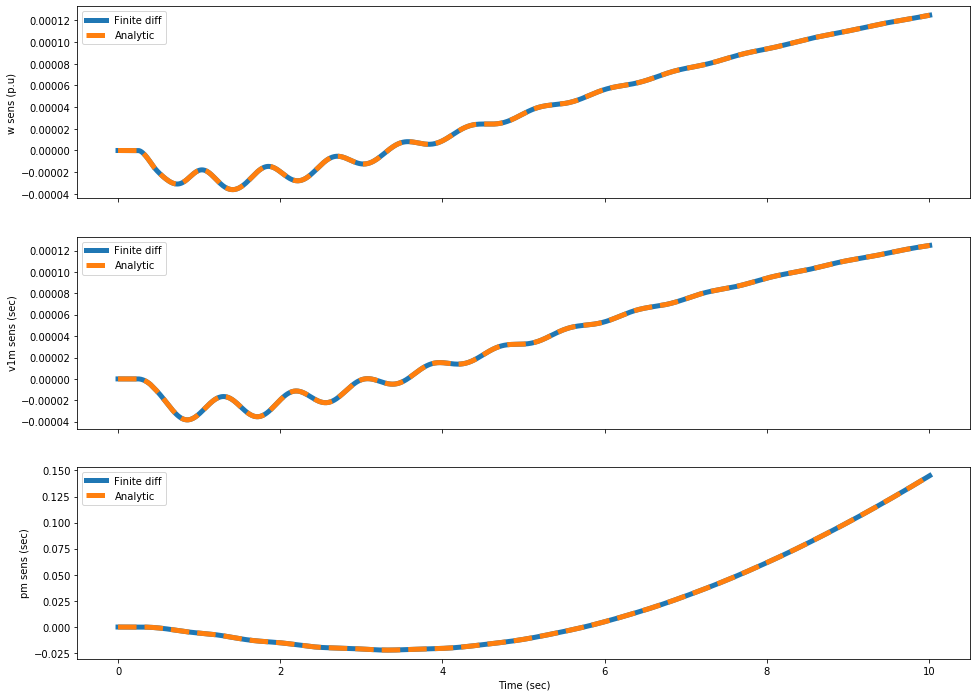

In [8]:
plt.figure(figsize = (16, 12))

load_idx = 1

# Integrate perturbed trajectories
psys.loads[0].set_alpha(alpha)
psys.loads[1].set_alpha(alpha2)
psys.loads[2].set_alpha(alpha)
tvec, history2, _, _, _ = integrate_system(psys, verbose = False,
                                                        comp_sens=False, tend=10.0, dt=h)

# PLOT
ax1 = plt.subplot(311)
plt.plot(tvec, (history2[4, :] - history[4, :]) / eps, label = 'Finite diff', linewidth = 5)
plt.plot(tvec, history_u[4, load_idx, :], label = 'Analytic', linestyle = '--', linewidth = 5)
plt.setp(ax1.get_xticklabels(), visible = False)
plt.ylabel("w sens (p.u)")
plt.legend()
ax2 = plt.subplot(312, sharex=ax1)
plt.plot(tvec, (history2[10, :] - history[10, :]) / eps, label = 'Finite diff', linewidth = 5)
plt.plot(tvec, history_u[10, load_idx, :], label = 'Analytic', linestyle = '--', linewidth = 5)
plt.setp(ax2.get_xticklabels(), visible=False)
plt.ylabel("v1m sens (sec)")
plt.legend()
ax3 = plt.subplot(313, sharex=ax1)
plt.plot(tvec, (history2[5, :] - history[5, :]) / eps, label = 'Finite diff', linewidth = 5)
plt.plot(tvec, history_u[5, load_idx, :], label = 'Analytic', linestyle = '--', linewidth = 5)
# make these tick labels invisible
plt.ylabel("pm sens (sec)")

plt.xlabel("Time (sec)")

plt.legend()

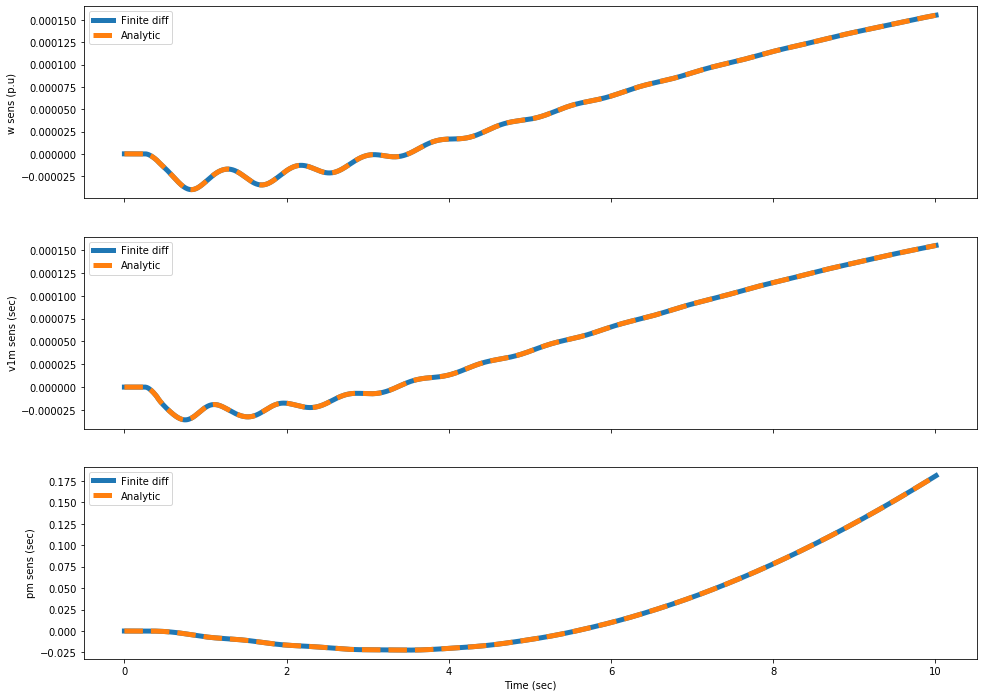

In [10]:
plt.figure(figsize = (16, 12))

load_idx = 2


# Integrate perturbed trajectories
psys.loads[0].set_alpha(alpha)
psys.loads[1].set_alpha(alpha)
psys.loads[2].set_alpha(alpha2)
tvec, history2, _, _, _ = integrate_system(psys, verbose = False,
                                                        comp_sens=False, tend=10.0, dt=h)

# PLOT
ax1 = plt.subplot(311)
plt.plot(tvec, (history2[4, :] - history[4, :]) / eps, label = 'Finite diff', linewidth = 5)
plt.plot(tvec, history_u[4, load_idx, :], label = 'Analytic', linestyle = '--', linewidth = 5)
plt.setp(ax1.get_xticklabels(), visible = False)
plt.ylabel("w sens (p.u)")
plt.legend()
ax2 = plt.subplot(312, sharex=ax1)
plt.plot(tvec, (history2[10, :] - history[10, :]) / eps, label = 'Finite diff', linewidth = 5)
plt.plot(tvec, history_u[10, load_idx, :], label = 'Analytic', linestyle = '--', linewidth = 5)
plt.setp(ax2.get_xticklabels(), visible=False)
plt.ylabel("v1m sens (sec)")
plt.legend()
ax3 = plt.subplot(313, sharex=ax1)
plt.plot(tvec, (history2[5, :] - history[5, :]) / eps, label = 'Finite diff', linewidth = 5)
plt.plot(tvec, history_u[5, load_idx, :], label = 'Analytic', linestyle = '--', linewidth = 5)
# make these tick labels invisible
plt.ylabel("pm sens (sec)")

plt.xlabel("Time (sec)")

plt.legend()